# 1) Solution of TSP for bruteforce

## Number of cities to be visited

In [21]:
n = 5

n =  5


## Matrix of distances between cities with random numbers

In [22]:
function d = distanceMatrixCities(n)

d = 100*rand(n);

## Fill diagonal with zeros
i = 1;
while(i<=n)
d(i,i) = 0;
i++;
end
d;
end

d = distanceMatrixCities(n)

d =

    0.00000   78.08963   68.01944   58.23054   73.84560
   68.40098    0.00000   38.27276   66.41281   49.94897
   83.92721   92.83847    0.00000   71.06855   65.83128
    2.80423   27.45455    8.85719    0.00000   18.18742
    6.76989   27.33897   31.46494   17.65895    0.00000



## Possible sequences of visited cities (e.g. 1,2,3,4,5 and 1,3,2,4,5)

In [23]:
p = perms([1:n]);

In [24]:
size(p)

ans =

   120     5



## Total travelled distance in each sequence of cities

In [25]:
function daccs = distanceCalculation(cities,d)

daccs = zeros([size(cities)(1),size(cities)(2)+1]);

for i = 1:(size(cities)(1))
    dacc = 0;
    for j = 1:(size(cities)(2)-1)
        dacc += d(cities(i,j),cities(i,j+1));
    end
    daccs(i,:) = [cities(i,:),dacc];
end
end

In [26]:
daccs = distanceCalculation(cities = p, d = d)

daccs =

     5.0000     4.0000     3.0000     2.0000     1.0000   187.7556
     5.0000     4.0000     3.0000     1.0000     2.0000   188.5330
     5.0000     4.0000     2.0000     3.0000     1.0000   167.3135
     5.0000     4.0000     2.0000     1.0000     3.0000   181.5339
     5.0000     4.0000     1.0000     3.0000     2.0000   181.3211
     5.0000     4.0000     1.0000     2.0000     3.0000   136.8256
     5.0000     3.0000     4.0000     2.0000     1.0000   198.3890
     5.0000     3.0000     4.0000     1.0000     2.0000   183.4273
     5.0000     3.0000     2.0000     4.0000     1.0000   193.5204
     5.0000     3.0000     2.0000     1.0000     4.0000   250.9349
     5.0000     3.0000     1.0000     4.0000     2.0000   201.0772
     5.0000     3.0000     1.0000     2.0000     4.0000   259.8946
     5.0000     2.0000     4.0000     3.0000     1.0000   186.5362
     5.0000     2.0000     4.0000     1.0000     3.0000   164.5754
     5.0000     2.0000     3.0000     4.0000     1.00

## Sequence of cities with the minimum total distance (optimal solution)

### Function that returns the index of the sequence of cities with the minimim total distance

In [27]:
function minS = minimumTotalDistance(daccs,nCities)

minD = min(daccs(:,nCities+1));
minS = 1;

for i = 1:size(daccs)(1)
    if(daccs(i,size(daccs)(2))==minD)
        minS = i;
    end
end

end

In [28]:
minS = minimumTotalDistance(daccs,nCities = n)

minS =  77


In [29]:
fprintf('Sequence of cities: %s\n',sprintf('%d ', daccs(minS,1:size(daccs)(2)-1)))
fprintf('Minimum distance: %s\n',sprintf('%d ', daccs(minS,size(daccs)(2))))

Sequence of cities: 2 5 1 4 3 
Minimum distance: 123.807 


# 2) Function that solve the TSP for any number of cities

In [30]:
function [n,minSeq,minDist,cpuTime] = TSP(nCities)

n = nCities;
d = distanceMatrixCities(n);
t=cputime;

p = perms([1:n]);

daccs = distanceCalculation(cities = p, d = d);

minS = minimumTotalDistance(daccs,nCities = nCities)

minSeq = daccs(minS,1:(size(daccs)(2)-1));
minDist = daccs(minS,size(daccs)(2));
cpuTime = cputime-t;


end

## Function to print results

In [31]:
function printResults(n,minSeq,minDist,cpuTime)

fprintf('Number of cities: %s\n',sprintf('%d ',n))
fprintf('Sequence of cities: %s\n',sprintf('%d ',minSeq))
fprintf('Minimum distance: %s\n',sprintf('%d ', minDist))
printf('Total cpu time: %f seconds\n', cpuTime)

end

## Executing our algorithm to solve the TSP for 4,5,6,7 and 8 cities

### 4 Cities

In [32]:
[a1,a2,a3,a4] = TSP(nCities = 4); printResults(a1,a2,a3,a4)

minS =  4
Number of cities: 4 
Sequence of cities: 4 2 1 3 
Minimum distance: 21.9499 
Total cpu time: 0.005479 seconds


### 5 Cities

In [33]:
[a1,a2,a3,a4] = TSP(nCities = 5); printResults(a1,a2,a3,a4)

minS =  67
Number of cities: 5 
Sequence of cities: 3 1 5 4 2 
Minimum distance: 84.0068 
Total cpu time: 0.032795 seconds


### 6 Cities

In [34]:
[a1,a2,a3,a4] = TSP(nCities = 6); printResults(a1,a2,a3,a4)

minS =  19
Number of cities: 6 
Sequence of cities: 6 5 1 4 3 2 
Minimum distance: 130.308 
Total cpu time: 0.245297 seconds


### 7 Cities

In [35]:
[a1,a2,a3,a4] = TSP(nCities = 7); printResults(a1,a2,a3,a4)

minS =  1722
Number of cities: 7 
Sequence of cities: 5 4 6 2 1 3 7 
Minimum distance: 98.9806 
Total cpu time: 1.554588 seconds


### 8 Cities

In [36]:
[a1,a2,a3,a4] = TSP(nCities = 8); printResults(a1,a2,a3,a4)

minS =  14495
Number of cities: 8 
Sequence of cities: 6 1 8 3 2 4 7 5 
Minimum distance: 139.89 
Total cpu time: 10.426214 seconds


## Visualization of the growth of computational time as the number of cities increase

In [37]:
function CPUTimeAndCities = plotNCitiesCPUTime(minNCities,maxNCities)

CPUTimeAndCities = zeros(maxNCities-minNCities+1,2);

count = 1;
for i = minNCities:maxNCities;

[nCities,minSeq,minDist,cpuTime] = TSP(nCities = i);
CPUTimeAndCities(count,1) = nCities;
CPUTimeAndCities(count,2) = cpuTime;
count++;

end

end

In [38]:
CPUTimeAndCities28 = plotNCitiesCPUTime(minNCities=2,maxNCities=8)

minS =  1
minS =  1
minS =  18
minS =  71
minS =  5
minS =  3128
minS =  1781
CPUTimeAndCities28 =

    2.0000000    0.0014740
    3.0000000    0.0025970
    4.0000000    0.0095370
    5.0000000    0.0310060
    6.0000000    0.1540890
    7.0000000    1.1194770
    8.0000000   10.5236900



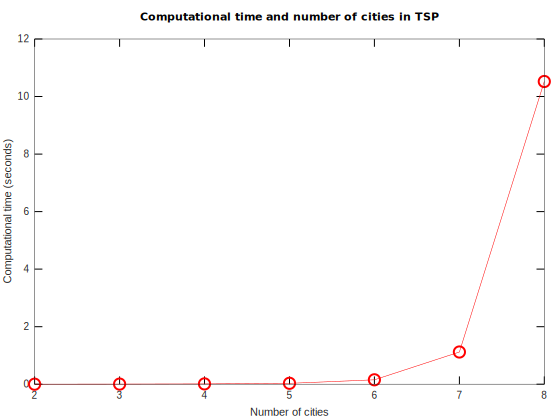

In [39]:
plot([CPUTimeAndCities28(:,1)], [CPUTimeAndCities28(:,2)], 'o-r');
title ("Computational time and number of cities in TSP");
xlabel ("Number of cities");
ylabel ("Computational time (seconds)");